# Predicting_house_prices

### Project Details

#### Aim
Build a simple linear regression model to predict house prices based on features like the **number of bedrooms** and **square footage**.

#### Description
Use a dataset of house prices, split it into training and testing sets, and build a regression model using Scikit-learn.

#### Technologies
Python, Pandas, Scikit-learn.</br>
Another technologies can be used.

In [2]:
# libraries to read and manipilation data
import pandas as pd
import numpy as np

# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# to split the data into train and test
from sklearn.model_selection import train_test_split

# library for linear regression model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Reading Data

In [3]:
df = pd.read_csv('Housing.csv')
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Data Overview

**price:** the price of the house (target value) </br>
**area:** the area in plg^2 </br>
**bedrooms:** number of bedrooms </br>
**bathrooms:** number of bathrooms </br>
**stories:** number of stories </br>
**mainroad:** does it has mainroad? yes/no</br>
**guestroom:** does it has guestroom? yes/no</br>
**basement:** does it has basement? yes/no</br>
**hotwaterheating:** does it has hotwaterheating? yes/no </br>
**airconditioning:** does it has airconditioning? yes/no </br>
**parking:** how many cars can you park into the house? yes/no</br>
**prefarea:** does it has prefarea? yes/no</br>
**furnishingstatus:** three status: furnished, semi-furnished, no furnished</br>

In [3]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [4]:
df.shape

(545, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

There are no missing values nor null values

In [7]:
df.describe(exclude='object')

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Price and area have a higher standard devation, so these could mean that there is a lot of variance and more spread out.</br>
Meanwhile the others(bed,bath,stor,park) have a few of standard deviation, so they are clustered tightly around the mean.

In [18]:
df.describe(exclude='int64')

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


Comments:</br>
All the data is complete, it doesn't have missing values, each feature has at least 2 values or states.</br>
We need to converse these columns in numeric values for regression modeling.

### Exploratory Data Analysis
#### 1. categorical columns

In [5]:
 df['price'].value_counts().index[:5].sort_values()

Int64Index([3150000, 3500000, 4200000, 4900000, 5600000], dtype='int64')

In [6]:
#definying a plot
def fine_barplot(dataframe, x_label, perc=False, n=None):
    """
    Barplot with percentage option
    dataframe: df input 
    x_label: the features in datataframe
    perce: do you want percentage option?
    n: the size in x
    """
    
    total = len(dataframe[x_label]) # length of the column
    count = dataframe[x_label].nunique() #count of value uniques
    
    #1. Defining the size of the plot
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n+1, 5))
    
    #2. creating the plot with COUNTPLOT of seaborn and saving it in ax variable
    ax = sns.countplot(
        data=dataframe,
        x=x_label,
        palette="Paired"
    )
    
    #3. Defining the percentage option, getting percentage in "label"
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height()/ total
            ) # setting the percentage of each class of the categor
        else: #Show only the total
            label = p.get_height()
        
        x = p.get_x() + p.get_width() / 2  # width of the bar
        y = p.get_height()  # height of the bar
        
        #here we write what we got in "label"
        ax.annotate(
            label,
            (x,y),
            ha="center",
            va="center",
            size=12,
            xytext=(0,5),
            textcoords="offset points"
        )
    plt.show()

#### 1.1 mainroad

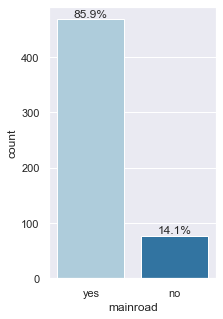

In [7]:
fine_barplot(df,'mainroad',perc=True)

In [8]:
df['mainroad'].value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

#### 1.2 guestroom

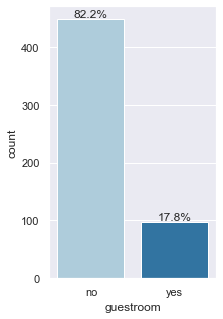

In [87]:
fine_barplot(df,'guestroom',perc=True)

In [82]:
df['guestroom'].value_counts()

no     448
yes     97
Name: guestroom, dtype: int64

#### 1.3 basement

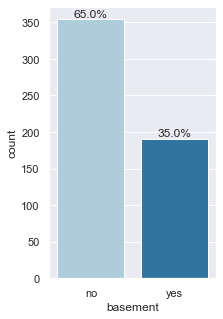

In [88]:
fine_barplot(df,'basement',perc=True)

In [23]:
df['basement'].value_counts()

no     354
yes    191
Name: basement, dtype: int64

#### 1.4 hotwaterheating

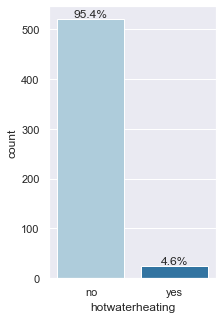

In [89]:
fine_barplot(df,'hotwaterheating',perc=True)

In [90]:
df['hotwaterheating'].value_counts()

no     520
yes     25
Name: hotwaterheating, dtype: int64

#### 1.5 airconditioning

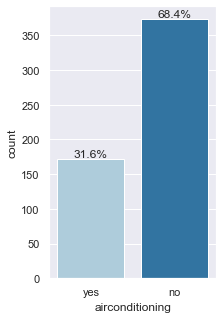

In [95]:
fine_barplot(df,'airconditioning',perc=True)

In [93]:
df['airconditioning'].value_counts()

no     373
yes    172
Name: airconditioning, dtype: int64

#### 1.6 prefarea

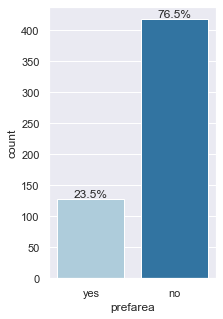

In [100]:
fine_barplot(df,'prefarea',perc=True)

In [26]:
df['prefarea'].value_counts()

no     417
yes    128
Name: prefarea, dtype: int64

#### 1.7 furnishingstatus

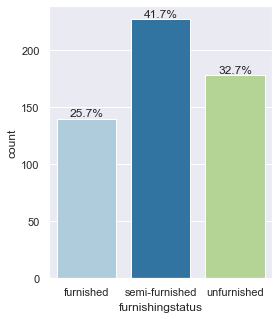

In [106]:
fine_barplot(df,'furnishingstatus',perc=True, n=None)

In [98]:
df['furnishingstatus'].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

#### 2. Numerical  Columns

In [9]:
#defining boxplot and histogram in one picture
def box_histo_plot(dataframe, x_label, figsize=(12,7), kde=False, bins=None):
    """
    dataframe: dataframe of data
    xlabel: feaure/s of the dataframe
    figsize: dimensions of the figure
    kde: does it show a density curve?
    bins: number of bins in the histogram (default None)
    """
    
    #1) creating 2 subplots in 2 roes
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True, #share x-axis among all the subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    
    #2.1) Adding boxplot in one first subplot
    sns.boxplot(
        data=dataframe, x=x_label, 
        ax=ax_box2, ##adding boxplot in subplot
        color="green"
    )
    ax_box2.axvline(
        dataframe[x_label].mean(), color="yellow", linestyle="-."
    )
    
    #2.2) Adding the histogram in second subplot
    if bins:#if we in arguments input define bins 
        sns.histplot(
            data=dataframe, x=x_labelure, kde=kde, 
            ax=ax_hist2, #addung histogram in subplot
            bins=bins, palette="winter")
    else:
        sns.histplot(data=dataframe, x=x_label, kde=kde, ax=ax_hist2)
    
    #Adding mean line to the histogram
    ax_hist2.axvline(
        dataframe[x_label].mean(), color="yellow", linestyle="-."
    )
    
    #Adding median line to the histogram    
    ax_hist2.axvline(
        dataframe[x_label].median(), color="red", linestyle="--"
    )
    plt.show()

#### 2.1 price

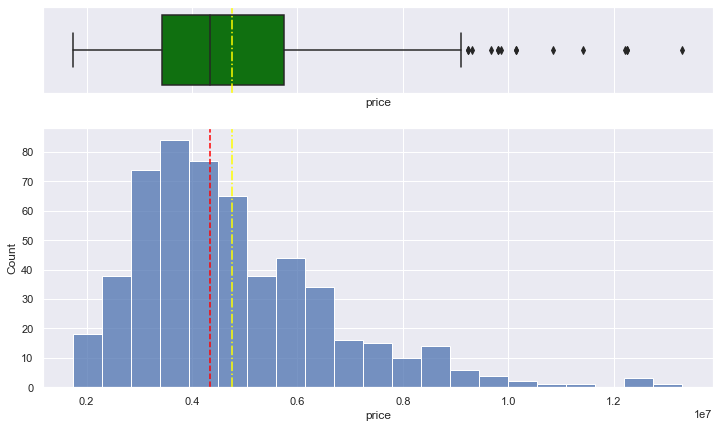

In [10]:
box_histo_plot(df, "price");

In [156]:
df.select_dtypes(include='number').columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

#### 2.2 area

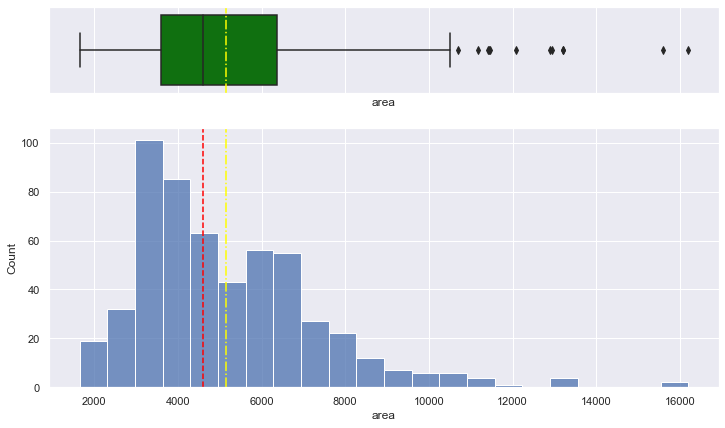

In [157]:
box_histo_plot(df, "area");

#### 2.3 bedrooms

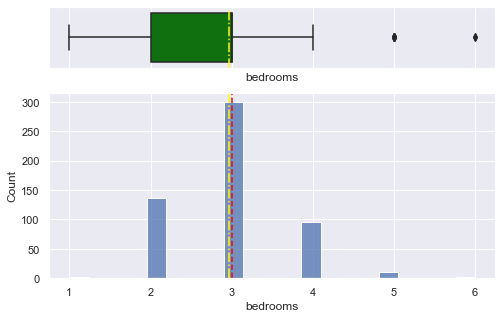

In [158]:
box_histo_plot(df, "bedrooms",figsize=(8,5))

#### 2.4 bathrooms

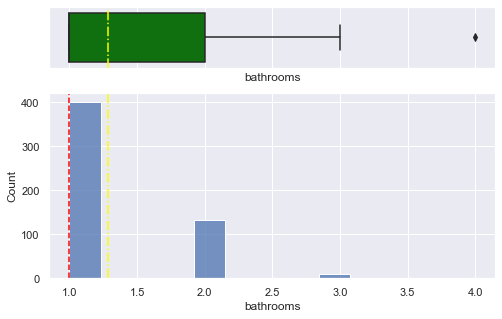

In [159]:
box_histo_plot(df,'bathrooms',figsize=(8,5))

#### 2.5 stories

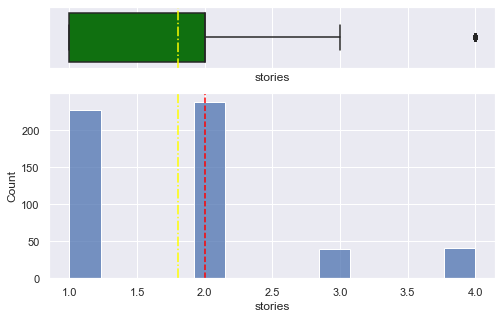

In [160]:
box_histo_plot(df,'stories',figsize=(8,5))

#### 2.6 parking

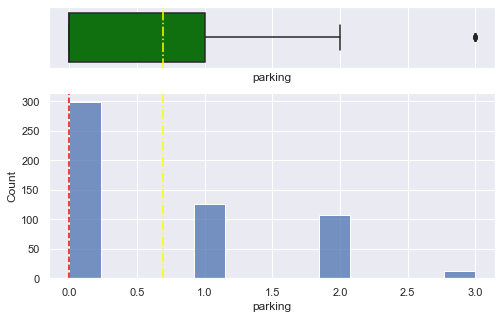

In [161]:
box_histo_plot(df,'parking',figsize=(8,5))

## Bivariate Analysis
#### Let's look at correlations

In [11]:
df[df.columns[:]].corr()["price"][:]

price        1.000000
area         0.535997
bedrooms     0.366494
bathrooms    0.517545
stories      0.420712
parking      0.384394
Name: price, dtype: float64

As we can see in numerical columns, with regards to price as a target value, the correlation is low among all the variables, only *area* and *bathrooms* have a little correlation.

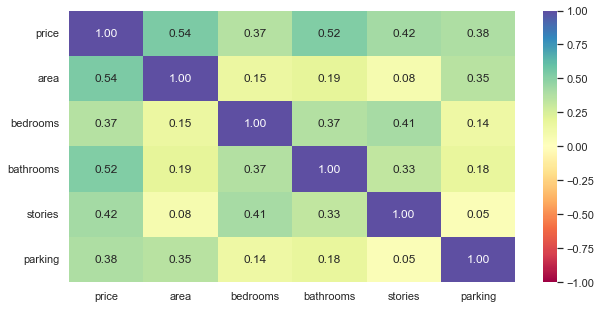

In [18]:
numeric_columns=df.select_dtypes(include='number').columns.tolist()
#numeric_columns.remove("price")

#correlations heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(
    df[numeric_columns].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)
plt.show()

**Comments:**
* By means of this graphic we can say that the predicted value: *price*, maitains a little positive correlation among area and bathrooms, it makes sense because the more surface area there is, the higher the price, and the more bathrooms there are, the higher the price.

### Building Linear Model 

1. We're going to separate actual and predicted values in two lists

In [20]:
# defining X and y variables
X = df.drop(["price"], axis=1)
y = df["price"]

In [21]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [22]:
y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

2  We're going to build encode the categorical values into numerical values

In [23]:
# Let's add an intercept to feature values, by adding a new column 
X = sm.add_constant(X)

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [25]:
X = pd.get_dummies(
    X,
    columns = X.select_dtypes(include=["object","category"]).columns.tolist(),
    drop_first=True
)
X.head()

,const,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.0,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,1.0,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,1.0,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,1.0,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,1.0,7420,4,1,2,2,1,1,1,0,1,0,0,0


In [27]:
# splitting the data into 70:30 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [32]:
print("Number of rows in X train data =", x_train.shape[0])
print("Number of rows in X test data =", x_test.shape[0])
print("Number of features in X data = ", x_train.shape[1])

Number of rows in X train data = 381
Number of rows in X test data = 164
Number of features in X data 14


In [30]:
print("Number of rows in Y train data =", y_train.shape[0])
print("Number of rows in Y test data =", y_test.shape[0])

Number of rows in Y train data = 381
Number of rows in Y test data = 164


3. Fitting the linear regression model

In [39]:
olsmod = sm.OLS(y_train, x_train).fit()

In [40]:
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.33
Date:                Tue, 06 Feb 2024   Prob (F-statistic):           1.02e-82
Time:                        19:13:55   Log-Likelihood:                -5810.6
No. Observations:                 381   AIC:                         1.165e+04
Df Residuals:                     367   BIC:                         1.170e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

### Metrics to evaluate the performance

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2)*(n-1)/(n-k-1))

# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100

# function to compute different metrics to check performance of a regression model
def measure_performance_regression(reg_model, predictors, target):
    """
    model: regressor
    predictors: independent variables
    target: dependent variables
    """

    # Getting metrics performance of regression by means: Target and Predicted Values
    pred = reg_model.predict(predictors)
    
    r2 = r2_score(target, pred)
    adjr2 = adj_r2_score(predictors, target, pred)
    rmse = np.sqrt(mean_squared_error(target, pred)) #Root Mean Square Error
    mae = mean_absolute_error(target, pred) #Mean Absolute Error
    mape = mape_score(target, pred) # compute MAPE

    # creating a dataframe of the calculated metrics
    df_metrics =  pd.DataFrame(np.array([[r2, adjr2, rmse, mae, mape]]),
                   columns=['R-squared', 'Adj. R-squared', 'RMSE','MAE','MAPE']
                    )
    return df_metrics

In [45]:
measure_performance_regression(olsmod,x_train,y_train)

,R-squared,Adj. R-squared,RMSE,MAE,MAPE
0,0.681237,0.669044,1.016728e+06,742532.225692,16.196534


In [46]:
measure_performance_regression(olsmod,x_test,y_test)

,R-squared,Adj. R-squared,RMSE,MAE,MAPE
0,0.66463,0.633119,1.168376e+06,852334.00655,19.766707


In [49]:
olsmod.predict(x_test)

62     6.230049e+06
247    6.329791e+06
142    6.600961e+06
107    5.513264e+06
483    4.306170e+06
           ...     
450    4.071955e+06
542    2.670559e+06
408    2.764433e+06
80     5.755530e+06
46     7.181578e+06
Length: 164, dtype: float64

## Building Regression Linear Model
#### Using  LinearRegression from sklearn.linear_model

In [50]:
from sklearn.linear_model import LinearRegression

In [52]:
reg_mod = LinearRegression()
reg_mod.fit(x_train, y_train);

Making the prediction of all testing set

In [103]:
ypred=reg_mod.predict(x_test)

In [57]:
measure_performance_regression(reg_mod,x_train,y_train) #measure prediction by using training set

,R-squared,Adj. R-squared,RMSE,MAE,MAPE
0,0.681237,0.669044,1.016728e+06,742532.225692,16.196534


In [58]:
measure_performance_regression(reg_mod,x_test,y_test) #measure prediction by using testing set

,R-squared,Adj. R-squared,RMSE,MAE,MAPE
0,0.66463,0.633119,1.168376e+06,852334.00655,19.766707


Observations:
* Either with library statsmodel.api or sklearn.linear_model, we have obtained the same performance and there is no difference between both.
* R-squared is not a good prediction because is far from 1.

PLotting the results between area (one of the features) and price (predicted value)

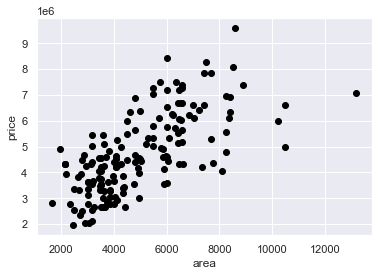

In [106]:
# Plot outputs
#plt.scatter(x_test['area'].tolist(), y_test, color="black")
plt.scatter(x_test['area'].tolist(), ypred, color="black")
#plt.plot(x_test['area'].tolist(), ypred, color="blue", linewidth=3)

plt.xlabel('area')
plt.ylabel('price')

plt.show()

Conclusions:
* We can see that there is a correlation between these variables, feature and predicted values, it has evidence because we saw in the correlation analysis that these variable has a correlation of 0.54